# 전처리

In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from IPython.display import set_matplotlib_formats

In [28]:
mpl.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')

In [3]:
df = pd.read_csv('data/merged_data.csv', encoding='cp949')


In [3]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자번호      190 non-null    int64  
 1   기업명        190 non-null    object 
 2   주요사업       190 non-null    object 
 3   주소         190 non-null    object 
 4   규모         190 non-null    object 
 5   산업명        190 non-null    object 
 6   종업원수       190 non-null    float64
 7   자산총계       190 non-null    float64
 8   총부채        190 non-null    float64
 9   자본총계       190 non-null    float64
 10  매출액        190 non-null    float64
 11  영업이익       190 non-null    float64
 12  당기순이익      190 non-null    float64
 13  영업이익률      190 non-null    float64
 14  TotalAvg   190 non-null    float64
 15  Welfare    190 non-null    float64
 16  Balance    190 non-null    float64
 17  Culture    190 non-null    float64
 18  Promotion  190 non-null    float64
 19  Executive  190 non-null    float64
 20  Recommend 

In [37]:
# 유니크한 row 개수 체크
df['사업자번호'].nunique()

176

In [38]:
# 중복된 row 제거
df.drop_duplicates(subset=['사업자번호'], inplace=True)

In [20]:
# '%'기호 제거
df['Recommend'] = df['Recommend'].str.strip('%')
df['Support'] = df['Support'].str.strip('%')
df['Growth'] = df['Growth'].str.strip('%')

In [82]:
# Recommend 와 Support 열에서 '--' 값이 있는 row 제거
cond = (df['Recommend'] != '--') & (df['Support'] != '--')
df = df[cond]

In [63]:
# growth 열의 평균 구하기
cond = df['Growth'] != '--'
df2 = df[cond]
growth_mean = int(df2['Growth'].astype('int').mean())

In [72]:
# Growth 열의 '--'값 평균으로 대치
cond = df['Growth'] == '--'
df.loc[cond, 'Growth'] = growth_mean

C:\Users\JuNoe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 189
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업자번호          169 non-null    int64  
 1   기업명            169 non-null    object 
 2   주요사업           169 non-null    object 
 3   주소             169 non-null    object 
 4   규모             169 non-null    object 
 5   산업명            169 non-null    object 
 6   종업원수           169 non-null    float64
 7   자산총계           169 non-null    float64
 8   총부채            169 non-null    float64
 9   자본총계           169 non-null    float64
 10  매출액            169 non-null    float64
 11  영업이익           169 non-null    float64
 12  당기순이익          169 non-null    float64
 13  영업이익률          169 non-null    float64
 14  TotalAvg       169 non-null    float64
 15  Welfare        169 non-null    float64
 16  Balance        169 non-null    float64
 17  Culture        169 non-null    float64
 18  Promotion 

In [79]:
type(df['Recommend'][0])

str

In [52]:
df['Support'].value_counts()

50    8
--    8
33    7
41    6
63    6
     ..
59    1
73    1
92    1
15    1
72    1
Name: Support, Length: 63, dtype: int64

In [90]:
df = df.astype({'Recommend':'int', 'Support':'int', 'Growth':'int'})

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 189
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업자번호          160 non-null    int64  
 1   기업명            160 non-null    object 
 2   주요사업           160 non-null    object 
 3   주소             160 non-null    object 
 4   규모             160 non-null    object 
 5   산업명            160 non-null    object 
 6   종업원수           160 non-null    float64
 7   자산총계           160 non-null    float64
 8   총부채            160 non-null    float64
 9   자본총계           160 non-null    float64
 10  매출액            160 non-null    float64
 11  영업이익           160 non-null    float64
 12  당기순이익          160 non-null    float64
 13  영업이익률          160 non-null    float64
 14  TotalAvg       160 non-null    float64
 15  Welfare        160 non-null    float64
 16  Balance        160 non-null    float64
 17  Culture        160 non-null    float64
 18  Promotion 

In [96]:
# 영업이익률 퍼센티지로 조정
df['영업이익률'] = df['영업이익률']*100

In [97]:
df['영업이익률']

0       6.847520
1      -0.533538
2       4.001049
3      21.756780
4       4.371107
         ...    
185     1.398428
186     6.824428
187     5.069742
188     9.664176
189     1.514528
Name: 영업이익률, Length: 160, dtype: float64

In [93]:
df.columns

Index(['사업자번호', '기업명', '주요사업', '주소', '규모', '산업명', '종업원수', '자산총계', '총부채',
       '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률', 'TotalAvg', 'Welfare',
       'Balance', 'Culture', 'Promotion', 'Executive', 'Recommend', 'Support',
       'Growth', 'review', 'structure', '지역', 'Recommend_new'],
      dtype='object')

In [98]:
# OLS에 필요할 것 같은 변수 추리기
new_df = df[['규모', '산업명', '종업원수', '자산총계', '총부채', '자본총계', '매출액',
            '영업이익', '당기순이익', '영업이익률', 'TotalAvg', 'Welfare', 'Balance',
            'Culture', 'Promotion', 'Executive', 'Recommend', 'Support','Growth',
            'structure', '지역']]

C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='규모', ylabel='매출액'>

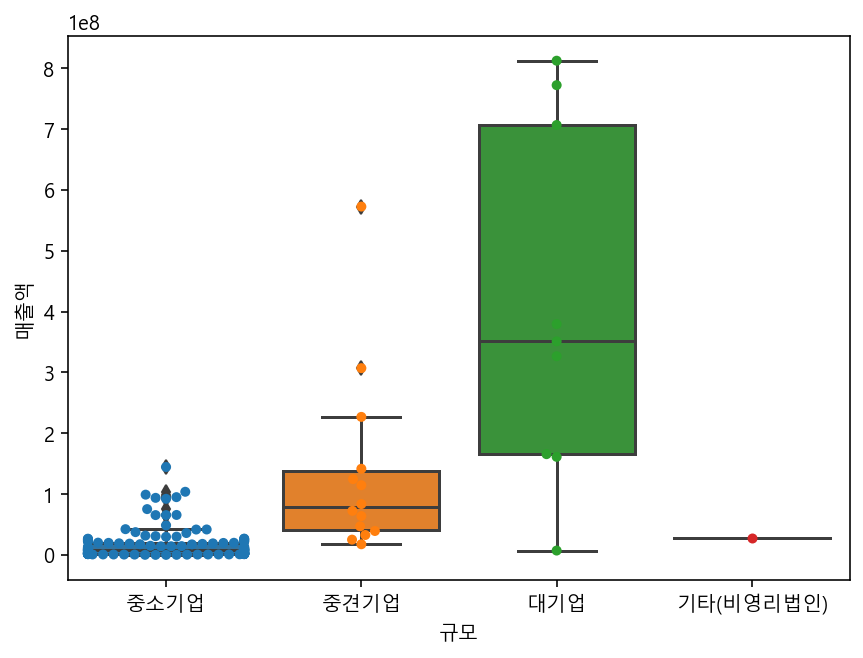

In [144]:
plt.subplots(figsize=(7, 5))
sns.boxplot(x='규모', y='매출액', data = new_df)
sns.swarmplot(x='규모', y='매출액', data= new_df)

C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points

<AxesSubplot:xlabel='종업원수', ylabel='매출액'>

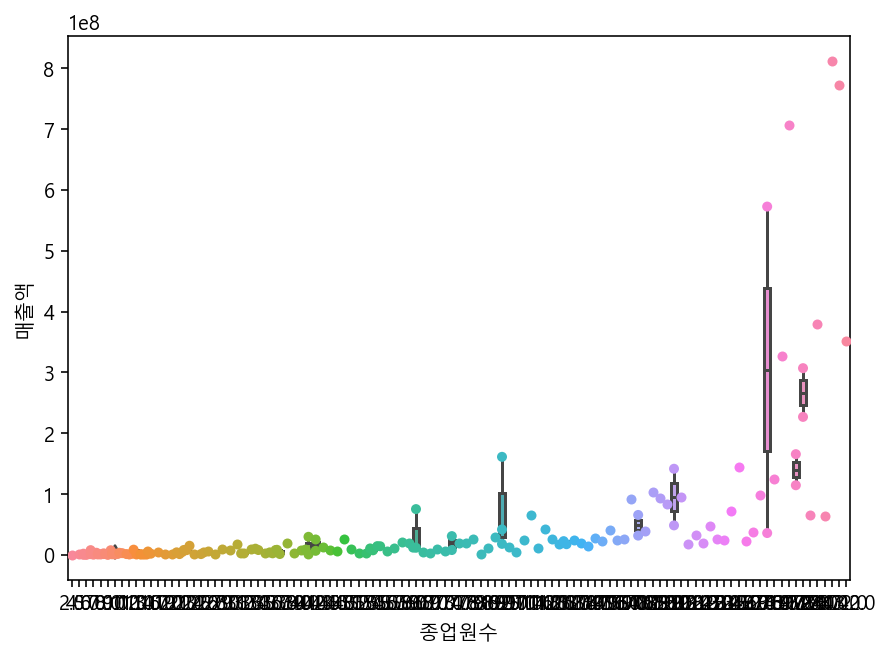

In [146]:
plt.subplots(figsize=(7, 5))
sns.boxplot(x='종업원수', y='매출액', data = new_df)
sns.swarmplot(x='종업원수', y='매출액', data= new_df)

C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points

<AxesSubplot:xlabel='TotalAvg', ylabel='매출액'>

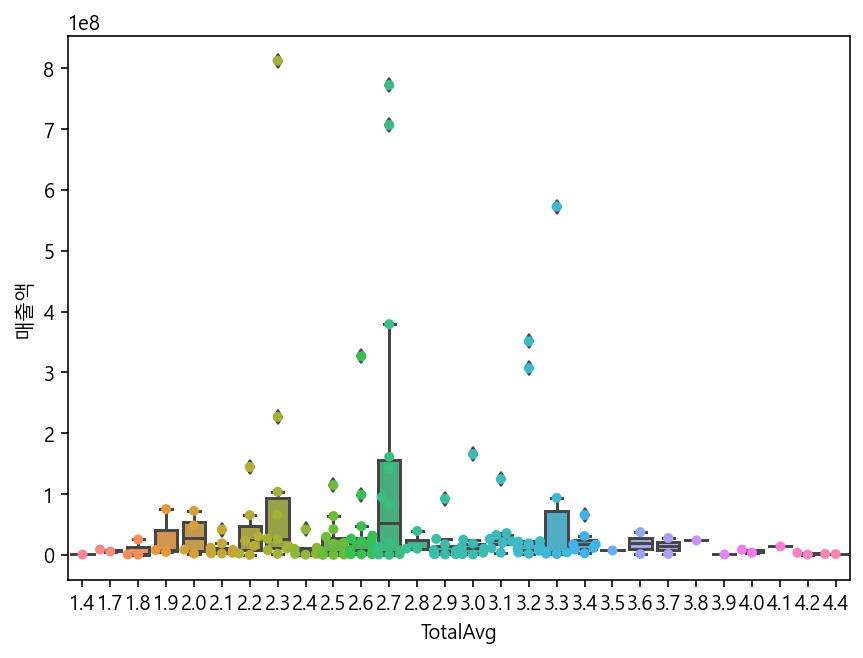

In [147]:
plt.subplots(figsize=(7, 5))
sns.boxplot(x='TotalAvg', y='매출액', data = new_df)
sns.swarmplot(x='TotalAvg', y='매출액', data= new_df)

In [101]:
new_df['지역'].value_counts()

서울    87
경기    37
대구     8
대전     6
충북     4
부산     3
경남     2
경북     2
인천     2
경상     2
충남     2
광주     2
강원     1
전북     1
울산     1
Name: 지역, dtype: int64

In [106]:
# 탑에서 몇 번째 까지 뽑아주는 함수
def topList(df, column, number):
    topList = df[column].value_counts().nlargest(number).index
    return topList

In [107]:
# 포함할 값 제외 other로 만드는 함수
def makeOther(df, column, encludingList):
    newDf = df[column].where(df[column].isin(encludingList), other="Other")
    return newDf

In [108]:
# 탑4개 지역 외 지역 other 처리
columnList = topList(new_df, '지역', 4)
new_df['지역'] = makeOther(new_df, '지역', columnList)

<ipython-input-108-cebe7833227f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['지역'] = makeOther(new_df, '지역', columnList)


In [109]:
new_df['지역']

0         서울
1         서울
2         서울
3         서울
4         서울
       ...  
185       경기
186    Other
187       경기
188       서울
189       대구
Name: 지역, Length: 160, dtype: object

In [110]:
# structure 0 -> hierarchy 1 -> Network 변환
cond = new_df['structure'] == 0
new_df.loc[cond,'structure'] = 'hierarchy'

C:\Users\JuNoe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [113]:
cond = new_df['structure'] == 1
new_df.loc[cond,'structure'] = 'Network'

C:\Users\JuNoe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [115]:
new_df['structure'].value_counts()

hierarchy    95
Network      65
Name: structure, dtype: int64

In [117]:
new_df['규모'].value_counts()

중소기업         136
중견기업          14
대기업            9
기타(비영리법인)      1
Name: 규모, dtype: int64

In [137]:
new_df.columns

Index(['규모', '산업명', '종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익',
       '영업이익률', 'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion',
       'Executive', 'Recommend', 'Support', 'Growth', 'structure', '지역'],
      dtype='object')

In [123]:
new_df1 = new_df[['규모', '산업명', '종업원수', '자산총계', '총부채', '자본총계',
                 '매출액', '영업이익', '영업이익', '당기순이익', '영업이익률'
                 ]]
new_df2 = new_df[['TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
                 'Recommend', 'Support', 'Growth', 'structure', '지역', '영업이익률'
                 ]]

In [125]:
new_df1

,규모,산업명,종업원수,자산총계,총부채,자본총계,매출액,영업이익,영업이익,당기순이익,영업이익률
0,중소기업,기타 정보기술 및 컴퓨터 운영 관련 서비스업,55.0,8855146.0,2587174.0,6267972.0,7298584.0,499772.0,499772.0,495864.0,6.847520
1,중소기업,"컴퓨터시스템 통합 자문, 구축 및 관리업",23.0,3204125.0,1880449.0,1323677.0,1638871.0,-8744.0,-8744.0,9102.0,-0.533538
2,중견기업,컴퓨터 프로그래밍 서비스업,97.0,39356151.0,18697507.0,20658644.0,25189266.0,1007835.0,1007835.0,339024.0,4.001049
3,중소기업,컴퓨터 프로그래밍 서비스업,230.0,26041882.0,11659671.0,14382211.0,23801344.0,5178406.0,5178406.0,3948871.0,21.756780
4,중소기업,컴퓨터 프로그래밍 서비스업,53.0,2928737.0,1618737.0,1310001.0,10711521.0,468212.0,468212.0,469136.0,4.371107
...,...,...,...,...,...,...,...,...,...,...,...
185,중소기업,통신·방송장비 및 부품 도매업,9.0,3445047.0,1841668.0,1603380.0,4269724.0,59709.0,59709.0,42935.0,1.398428
186,중소기업,통신 및 방송 장비 제조업,6.0,3450742.0,2391453.0,1059289.0,3675795.0,250852.0,250852.0,152862.0,6.824428
187,중소기업,통신·방송장비 및 부품 도매업,45.0,1877602.0,810098.0,1067504.0,6954259.0,352563.0,352563.0,341846.0,5.069742
188,중소기업,통신 판매업,200.0,53236514.0,29862027.0,23374487.0,95056349.0,9186413.0,9186413.0,6859635.0,9.664176


C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 2160x2160 with 0 Axes>

C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


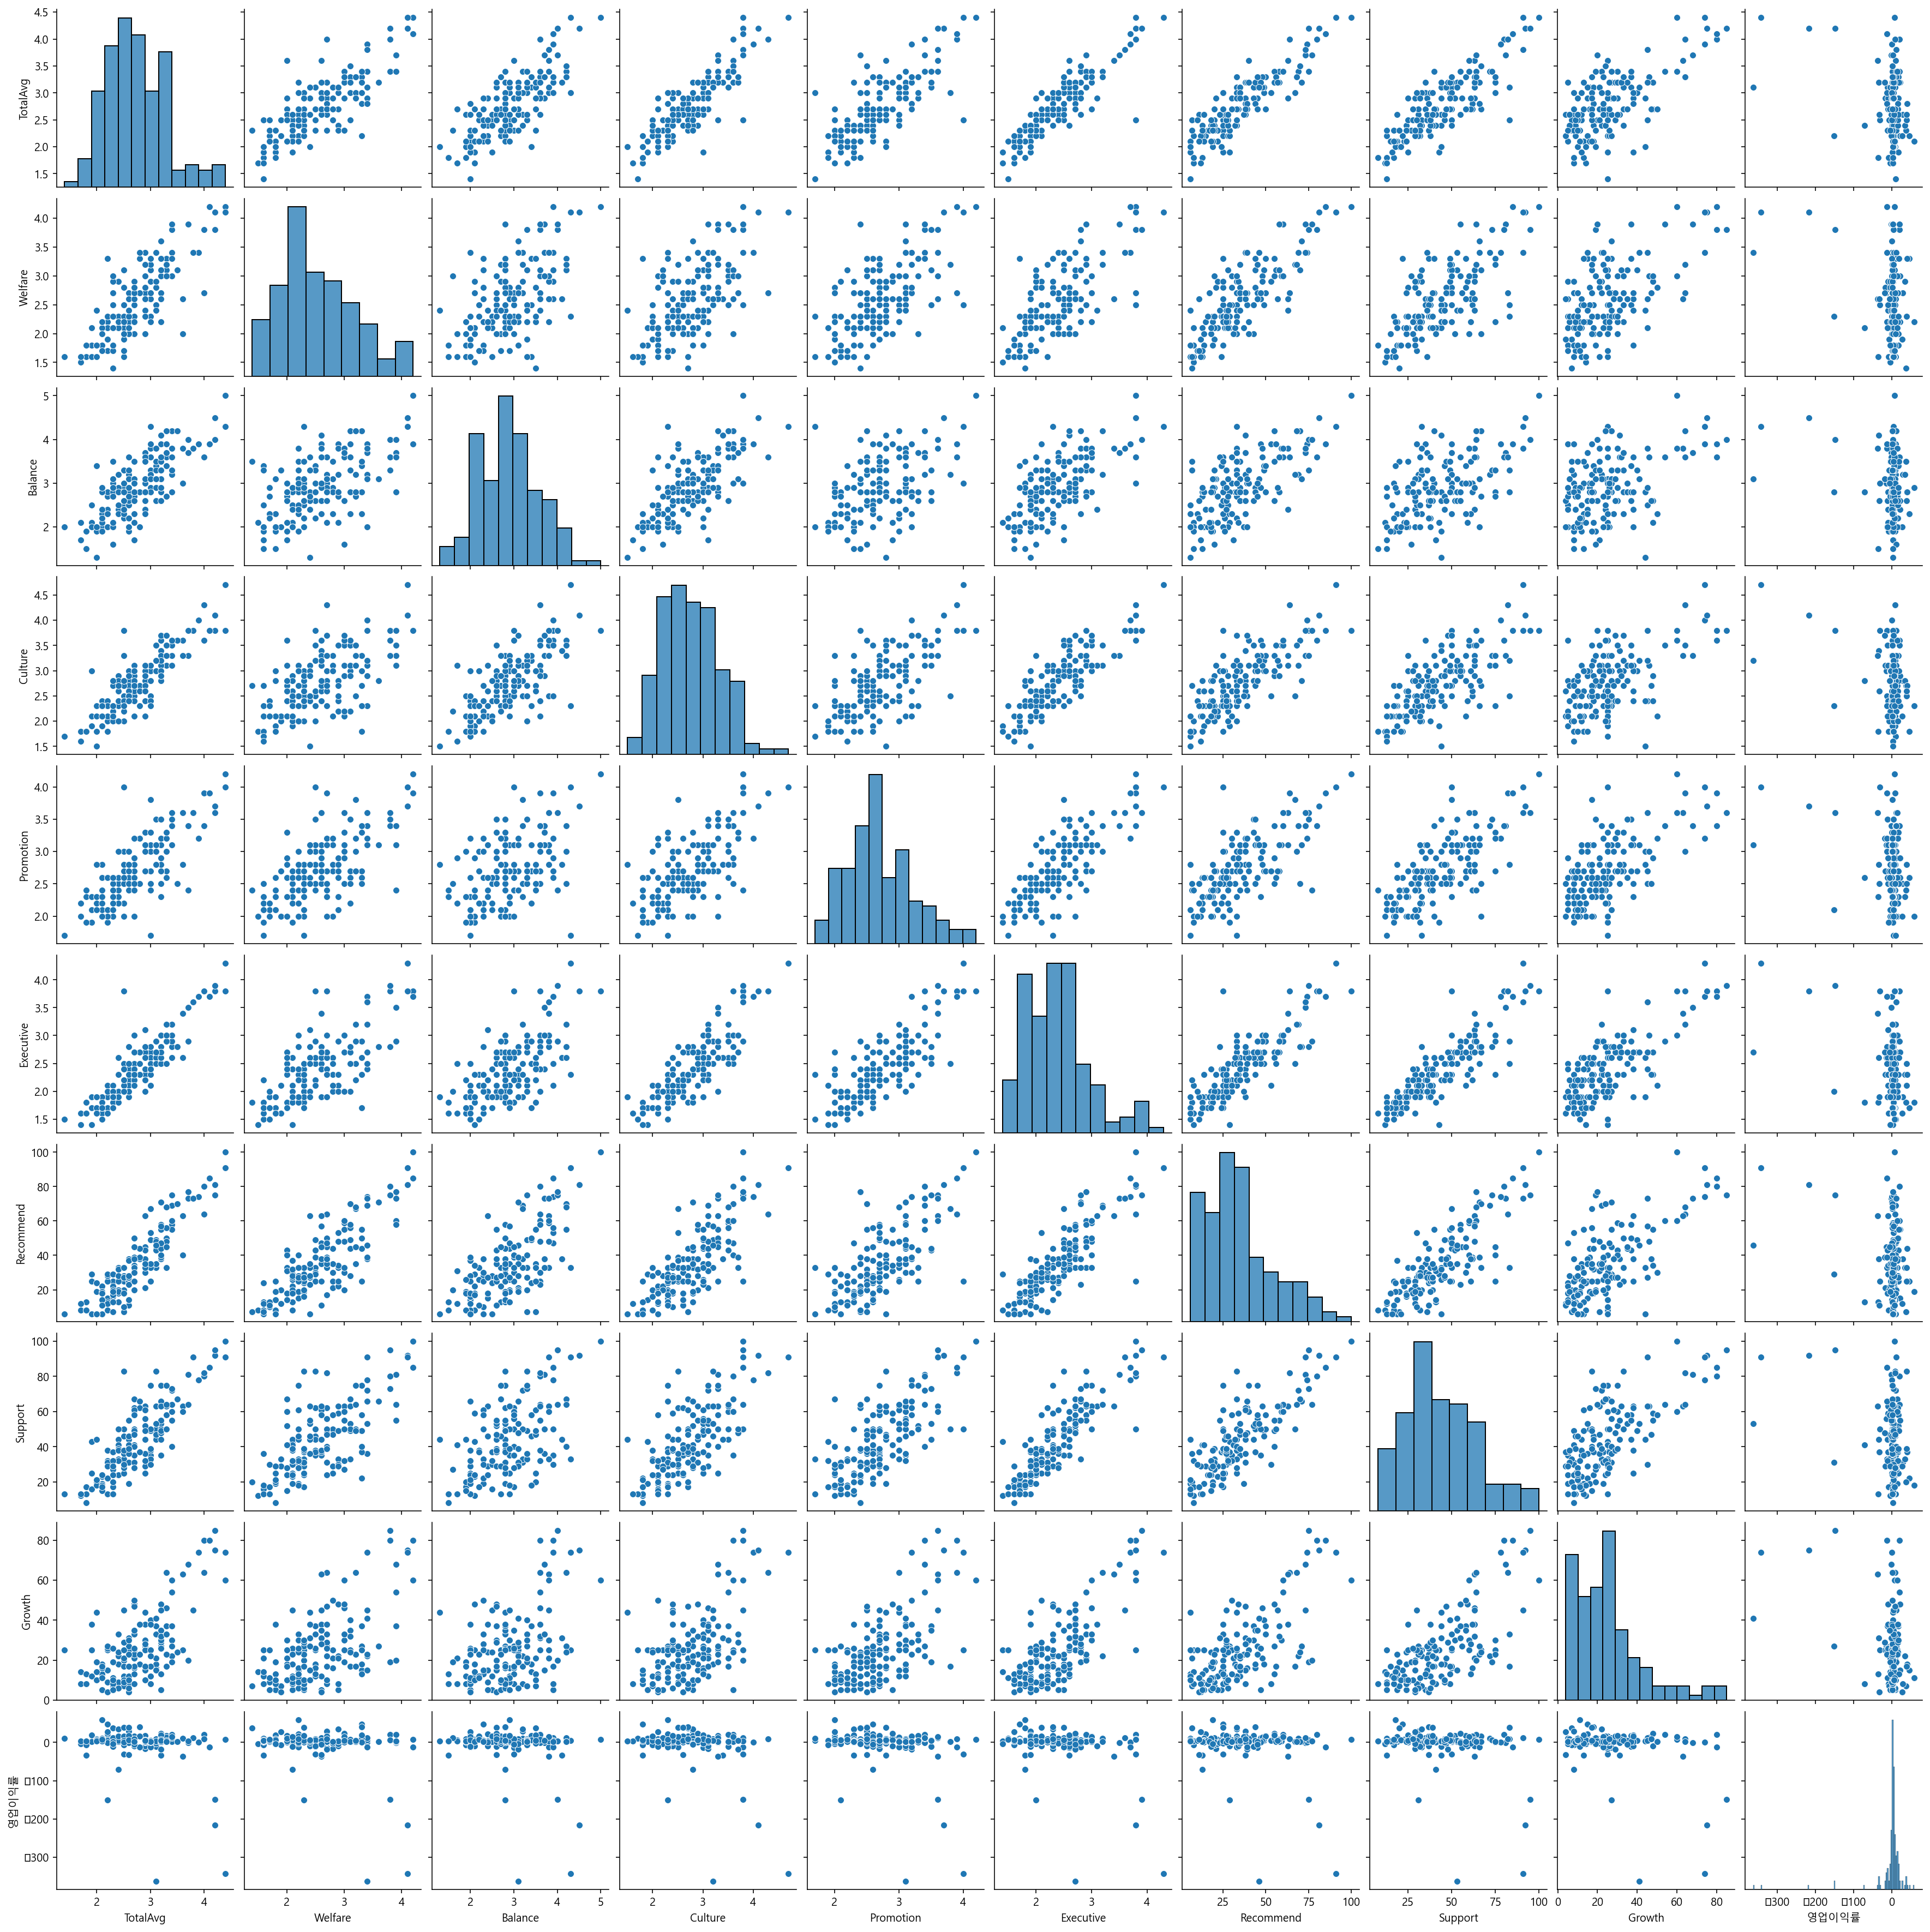

In [149]:
plt.figure(figsize=[30,30])
sns.pairplot(new_df2)
plt.show()

- growth, recommen, executive log 변환 필요

# 변수 log치환

<AxesSubplot:xlabel='Growth', ylabel='Count'>

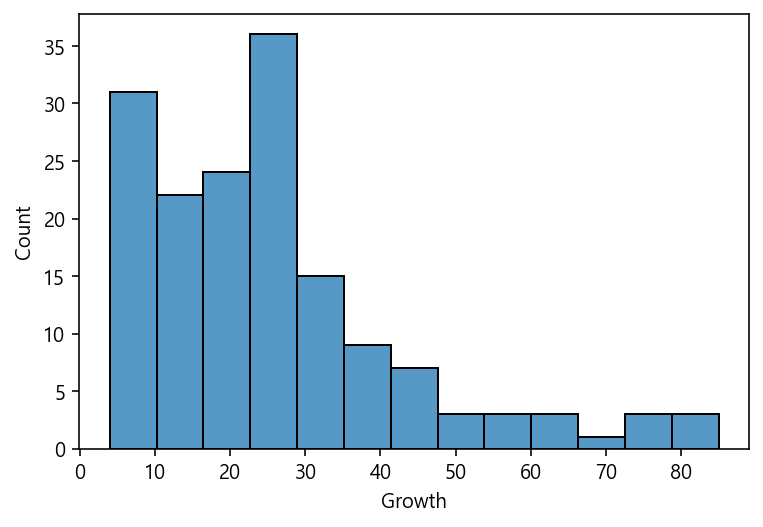

In [140]:
sns.histplot(new_df['Growth'])

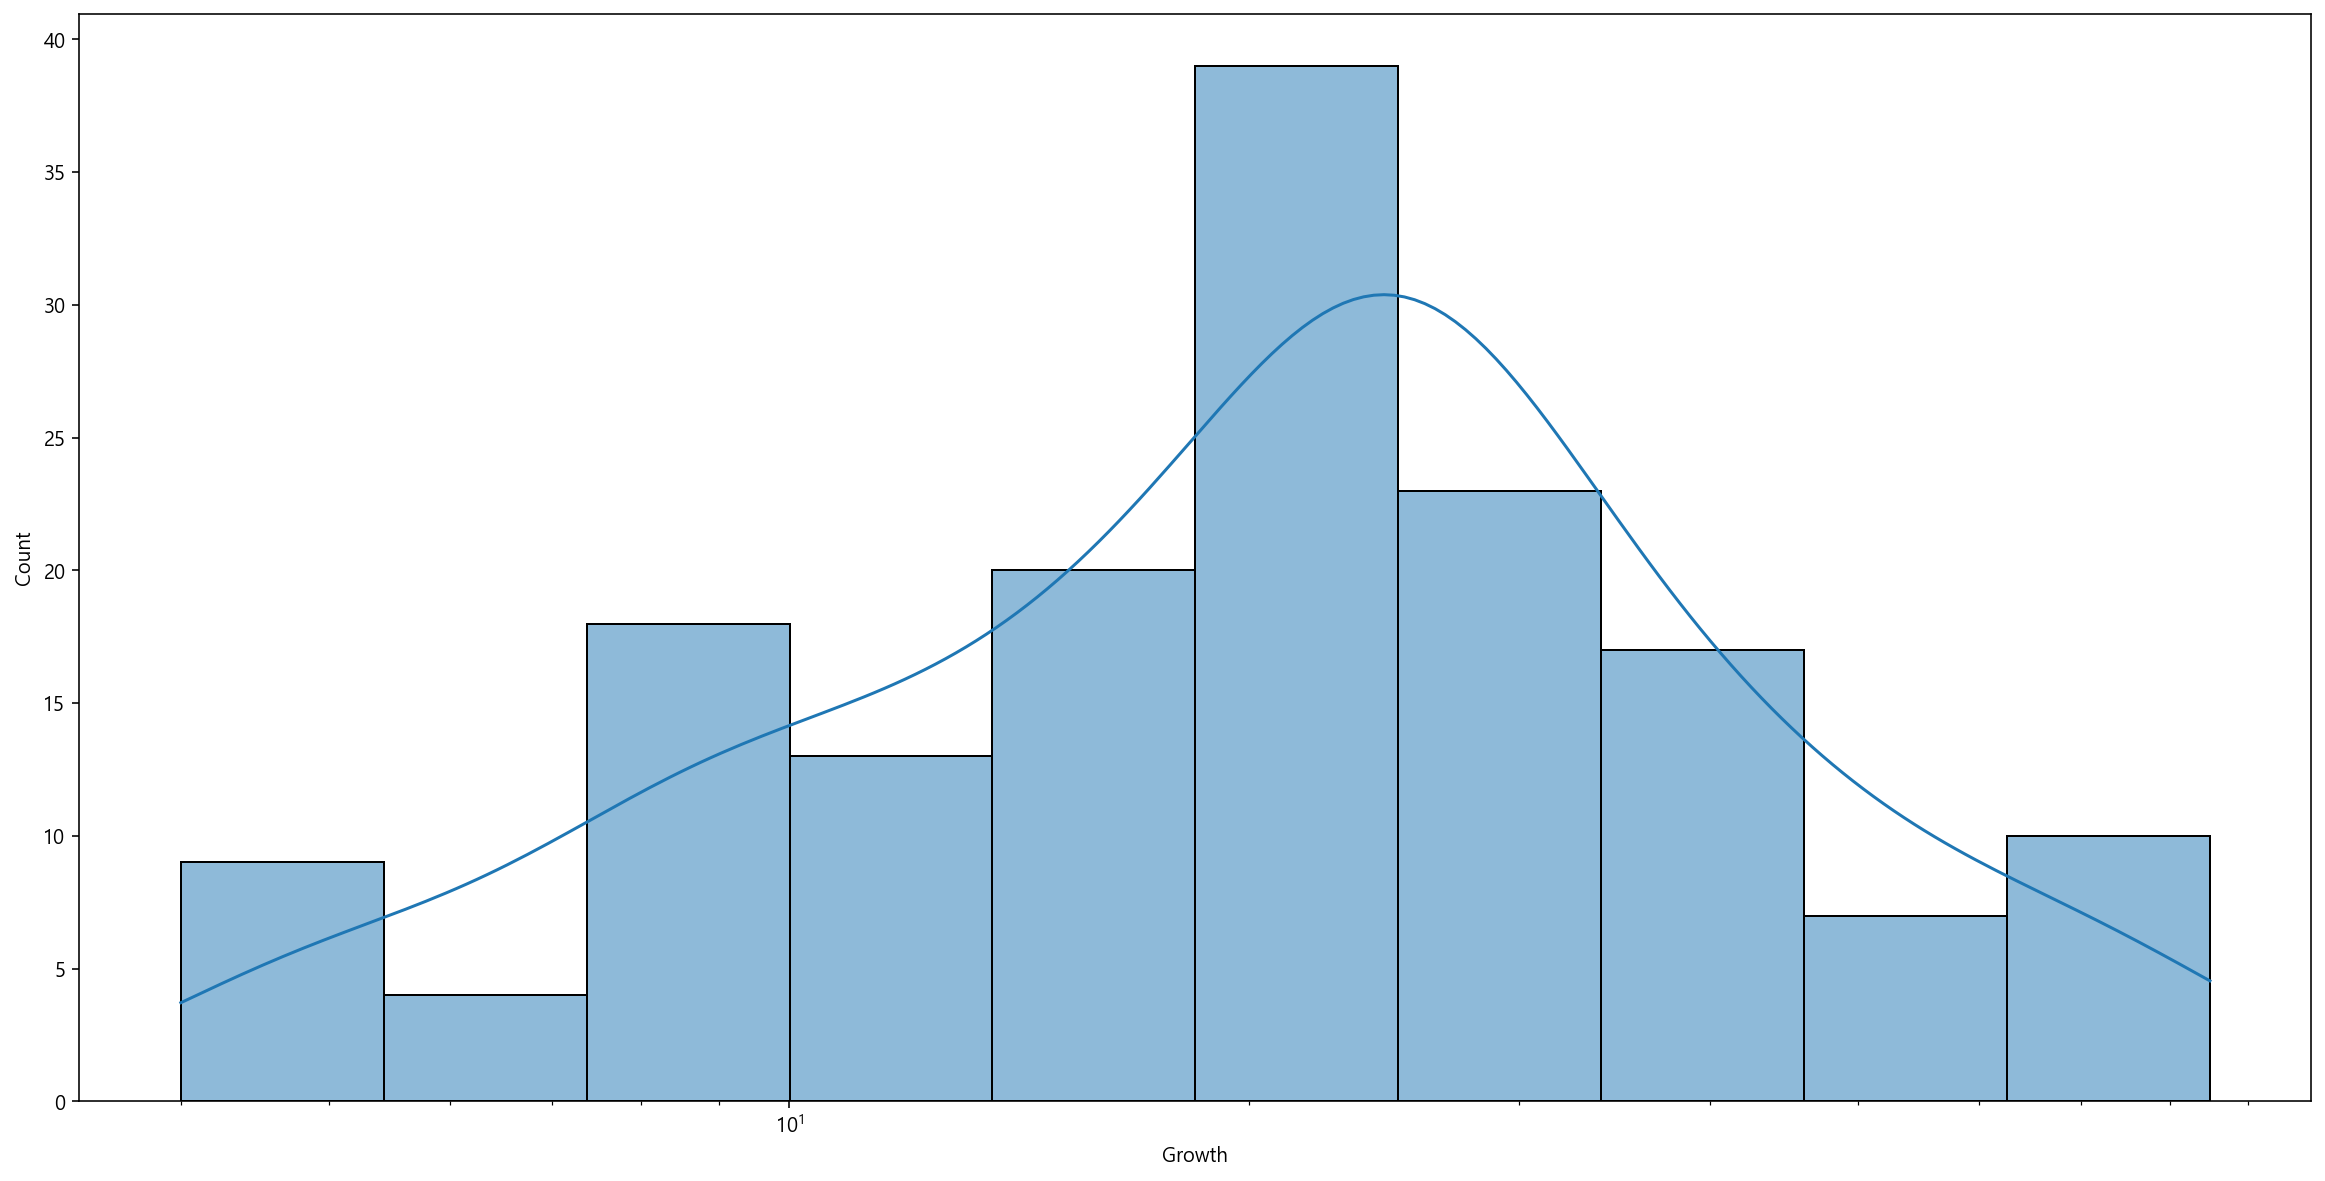

In [163]:
plt.figure(figsize=(20,10))
sns.histplot(data=new_df, x="Growth", log_scale=True, kde=True, bins = 10)
plt.show()

<AxesSubplot:xlabel='Recommend', ylabel='Count'>

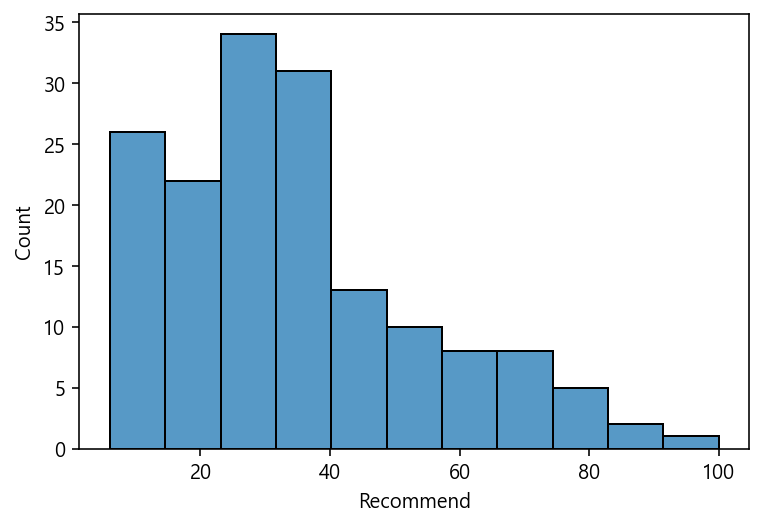

In [148]:
sns.histplot(new_df['Recommend'])

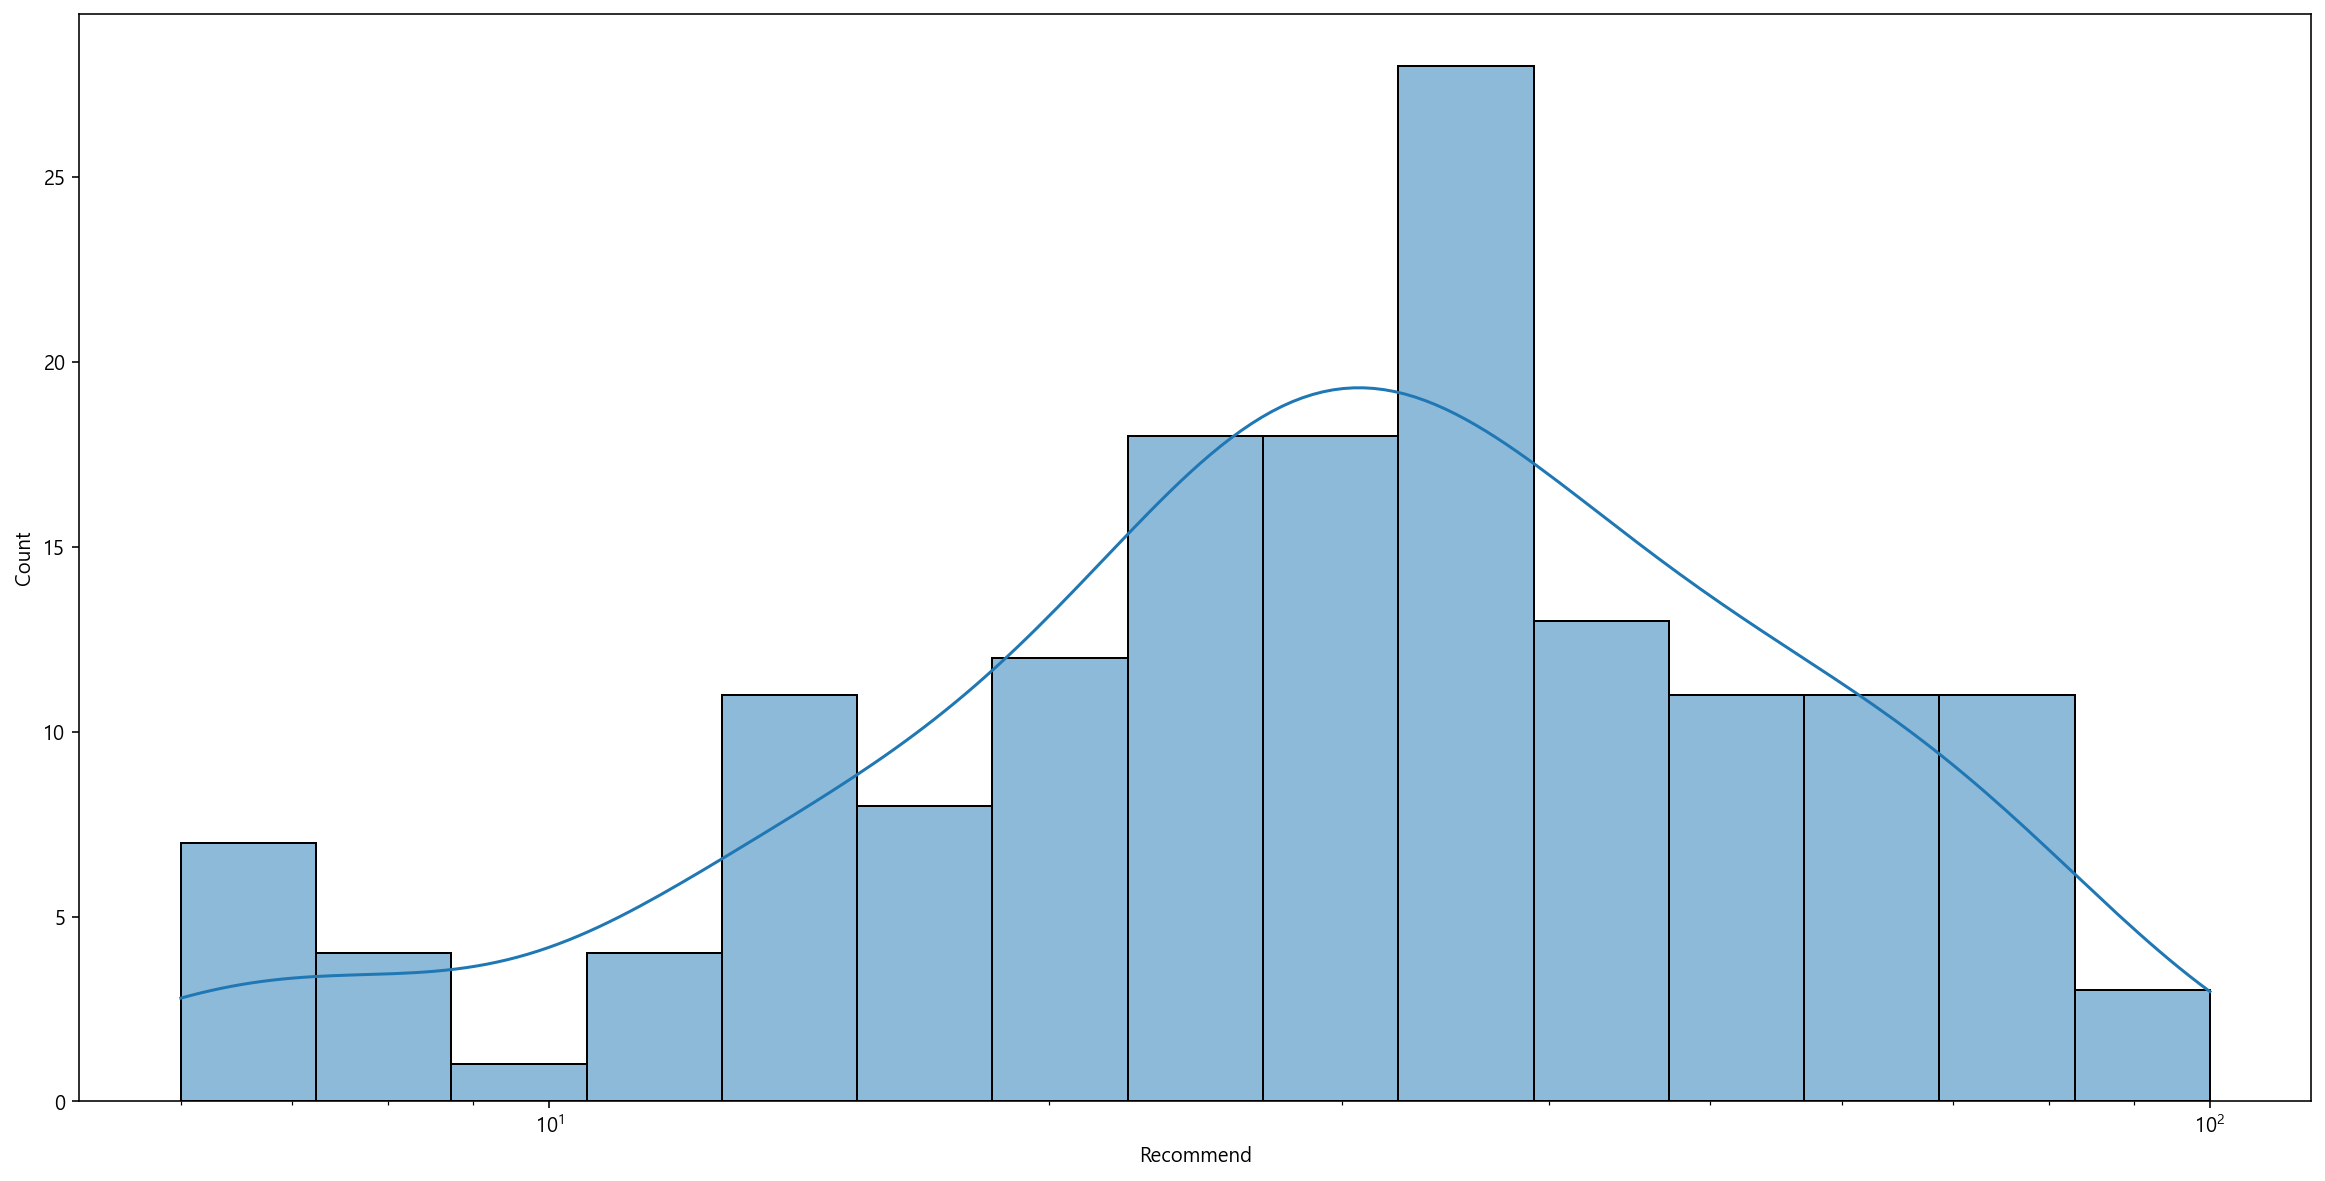

In [157]:
plt.figure(figsize=(20,10))
sns.histplot(data=new_df, x="Recommend", log_scale=True, kde=True, bins = 15)
plt.show()

<AxesSubplot:xlabel='Executive', ylabel='Count'>

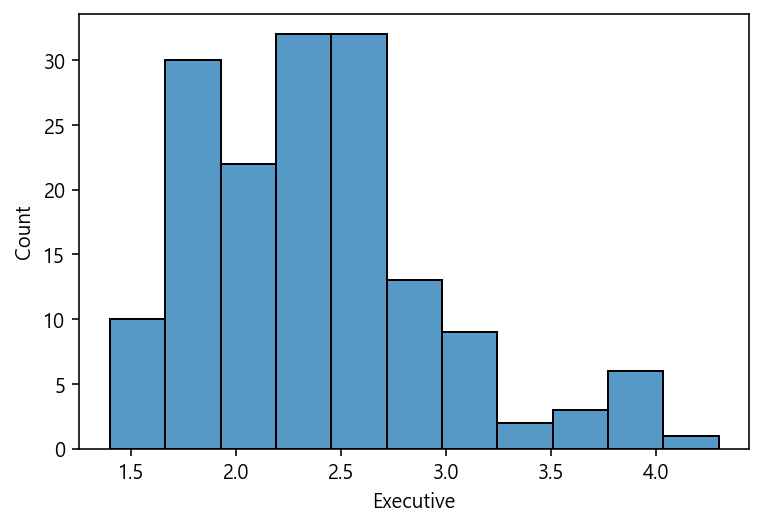

In [150]:
sns.histplot(new_df['Executive'])

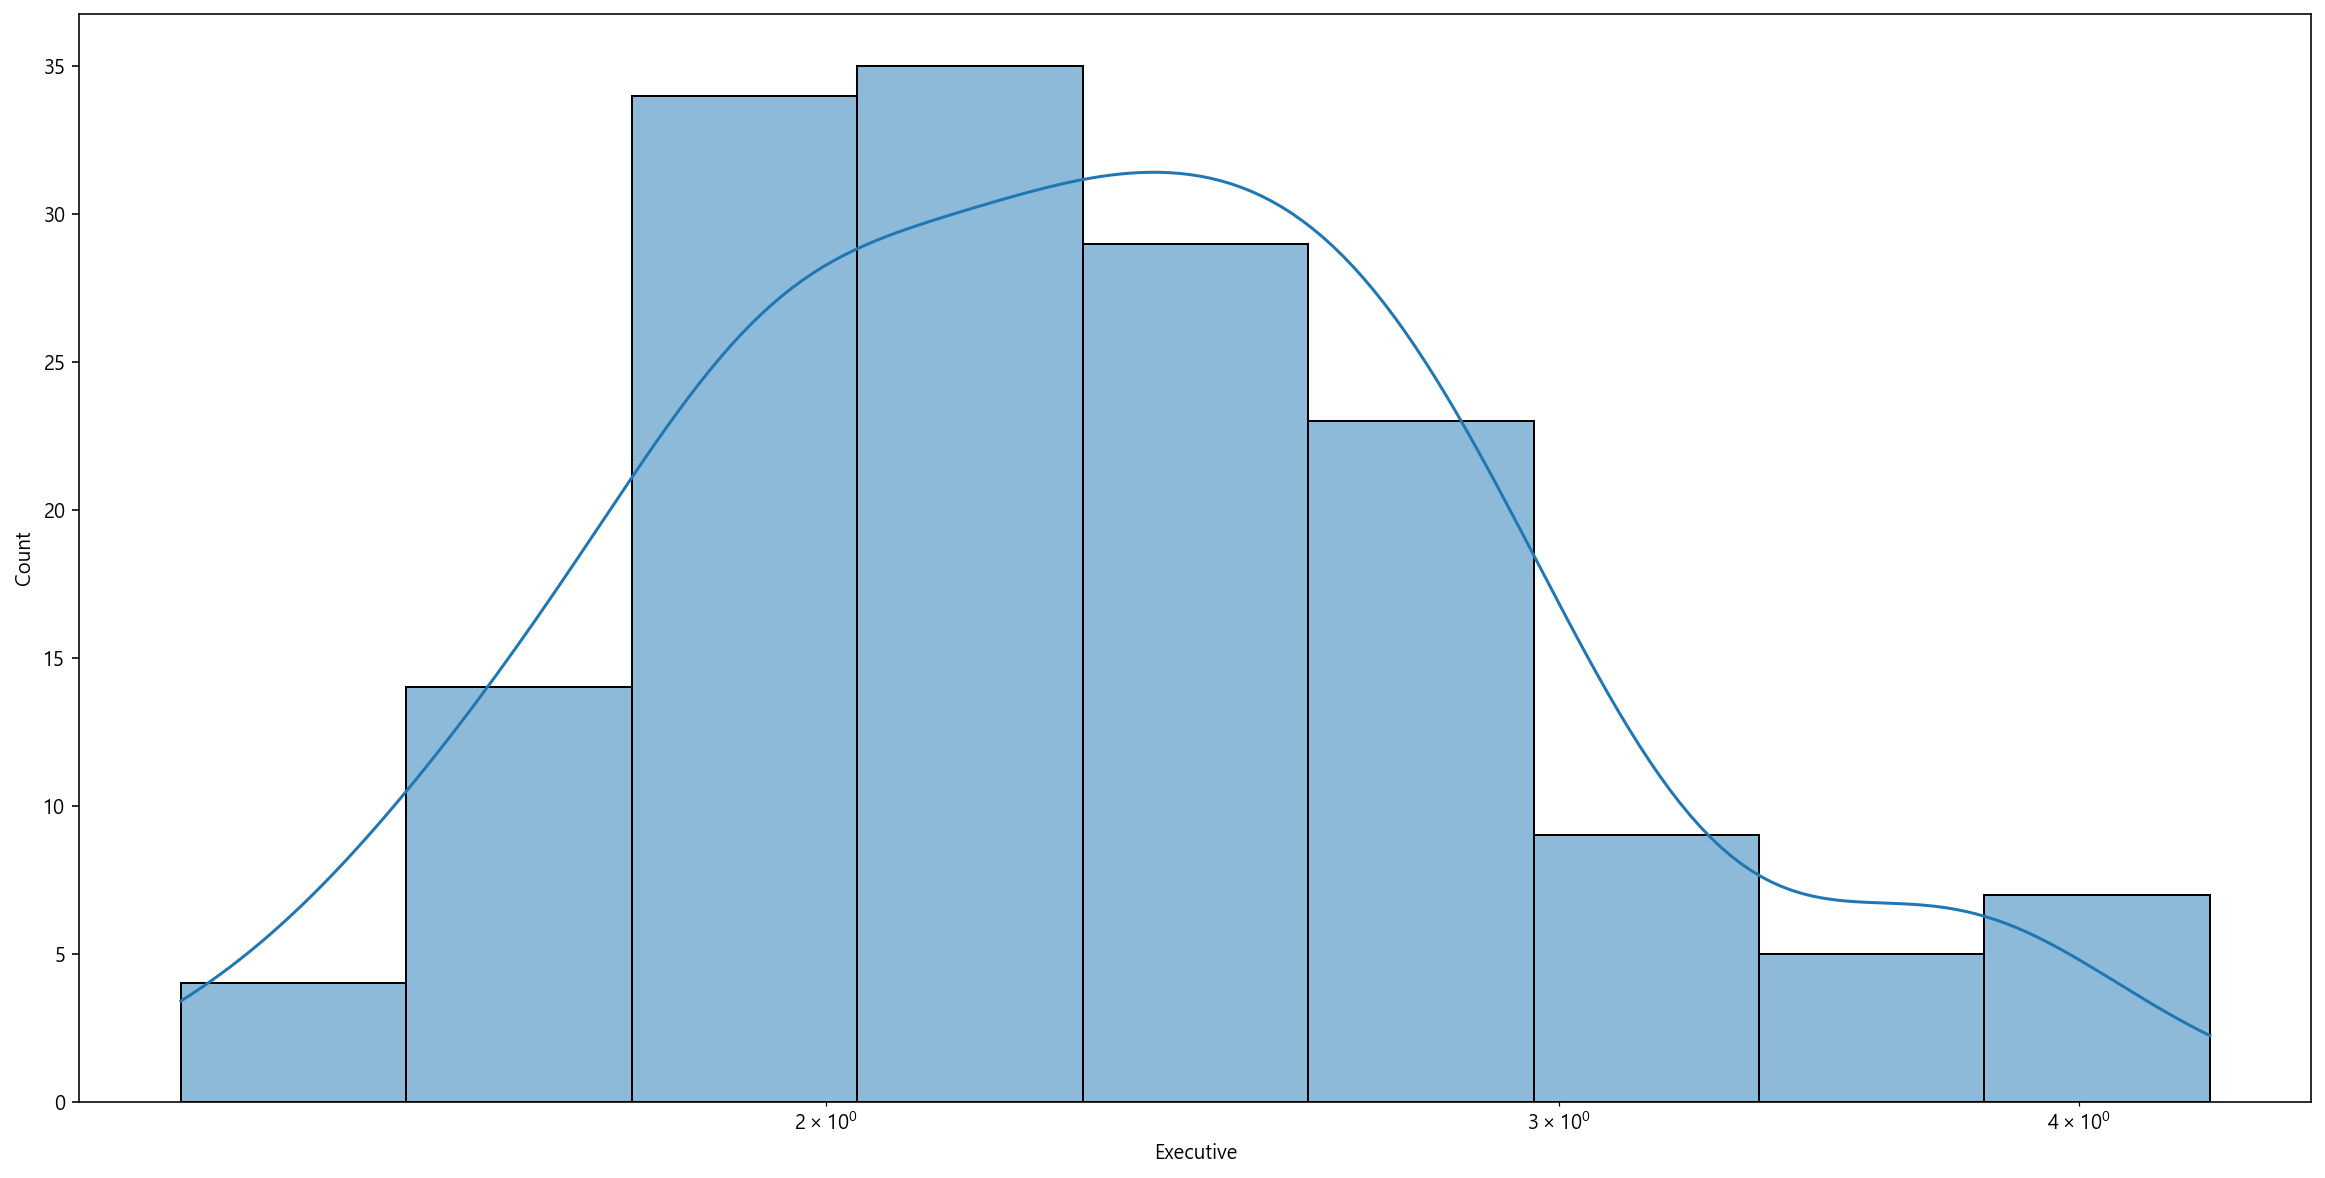

In [161]:
plt.figure(figsize=(20,10))
sns.histplot(data=new_df, x="Executive", log_scale=True, kde=True, bins = 9)
plt.show()

In [166]:
new_df["Log_Growth"] = np.log1p(new_df["Growth"])
new_df["Log_Promotion"] = np.log1p(new_df["Promotion"])
new_df["Log_Executive"] = np.log1p(new_df["Executive"])

<ipython-input-166-4e110b53ffb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Log_Growth"] = np.log1p(new_df["Growth"])
<ipython-input-166-4e110b53ffb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Log_Promotion"] = np.log1p(new_df["Promotion"])
<ipython-input-166-4e110b53ffb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

# 상관관계표

In [132]:
# 상관관계표
new_df.corr()

,종업원수,자산총계,총부채,자본총계,매출액,영업이익,당기순이익,영업이익률,TotalAvg,Welfare,Balance,Culture,Promotion,Executive,Recommend,Support,Growth
종업원수,1.000000,0.425547,0.349922,0.325430,0.642709,0.280493,0.289788,0.034578,0.012233,0.028453,-0.037750,0.008328,-0.100836,-0.041237,-0.007197,-0.050579,-0.102939
자산총계,0.425547,1.000000,0.843067,0.738691,0.741690,0.554213,0.595004,0.067465,-0.028925,0.152636,-0.016976,-0.076387,-0.076649,-0.085478,-0.001208,-0.051885,-0.104901
총부채,0.349922,0.843067,1.000000,0.260259,0.741303,0.367974,0.375994,0.023298,0.010325,0.121689,0.056397,0.013550,-0.058497,-0.019263,0.021405,0.008840,-0.062926
자본총계,0.325430,0.738691,0.260259,1.000000,0.402484,0.533802,0.596983,0.091922,-0.064870,0.121516,-0.101161,-0.154123,-0.064294,-0.129318,-0.028996,-0.104229,-0.109465
매출액,0.642709,0.741690,0.741303,0.402484,1.000000,0.536989,0.561733,0.059428,-0.016546,0.094420,-0.008475,-0.030726,-0.131572,-0.061284,-0.013322,-0.044566,-0.134459
영업이익,0.280493,0.554213,0.367974,0.533802,0.536989,1.000000,0.891701,0.293700,-0.111475,0.049318,-0.079330,-0.160636,-0.141965,-0.169070,-0.069840,-0.169523,-0.164656
당기순이익,0.289788,0.595004,0.375994,0.596983,0.561733,0.891701,1.000000,0.296331,-0.096165,0.046611,-0.075981,-0.149506,-0.129665,-0.158785,-0.050124,-0.157946,-0.173224
영업이익률,0.034578,0.067465,0.023298,0.091922,0.059428,0.293700,0.296331,1.000000,-0.279029,-0.265211,-0.206645,-0.293980,-0.263538,-0.312737,-0.244478,-0.251067,-0.332159
TotalAvg,0.012233,-0.028925,0.010325,-0.064870,-0.016546,-0.111475,-0.096165,-0.279029,1.000000,0.797072,0.767532,0.858341,0.750023,0.894779,0.890363,0.836207,0.676678
Welfare,0.028453,0.152636,0.121689,0.121516,0.094420,0.049318,0.046611,-0.265211,0.797072,1.000000,0.574711,0.628944,0.649434,0.707138,0.830592,0.714406,0.578055


In [171]:
del new_df['산업명']

In [180]:
new_df.T

,0,1,2,3,4,5,6,7,8,9,...,178,180,181,182,183,185,186,187,188,189
규모,중소기업,중소기업,중견기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업,...,중소기업,중소기업,중소기업,대기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업
종업원수,55,23,97,230,53,777,30,81,35,59,...,21,7,14,89,269,9,6,45,200,7
자산총계,8.85515e+06,3.20412e+06,3.93562e+07,2.60419e+07,2.92874e+06,2.52884e+07,9.84903e+06,1.45848e+07,734090,2.2124e+07,...,2.10256e+06,2.30565e+06,1.65439e+06,1.35917e+08,2.40101e+08,3.44505e+06,3.45074e+06,1.8776e+06,5.32365e+07,769805
총부채,2.58717e+06,1.88045e+06,1.86975e+07,1.16597e+07,1.61874e+06,1.26814e+07,5.85968e+06,1.13071e+07,261664,1.84066e+07,...,637427,608303,550990,3.06029e+07,4.09851e+07,1.84167e+06,2.39145e+06,810098,2.9862e+07,598736
자본총계,6.26797e+06,1.32368e+06,2.06586e+07,1.43822e+07,1.31e+06,1.26069e+07,3.98935e+06,3.27764e+06,472426,3.71739e+06,...,1.46513e+06,1.69734e+06,1.1034e+06,1.05314e+08,1.99116e+08,1.60338e+06,1.05929e+06,1.0675e+06,2.33745e+07,171069
매출액,7.29858e+06,1.63887e+06,2.51893e+07,2.38013e+07,1.07115e+07,6.55673e+07,1.86767e+07,1.06636e+07,2.70661e+06,7.5404e+07,...,8.21591e+06,2.62253e+06,5.71085e+06,1.61304e+08,9.91438e+07,4.26972e+06,3.6758e+06,6.95426e+06,9.50563e+07,1.47881e+06
영업이익,499772,-8744,1.00784e+06,5.17841e+06,468212,4.57144e+06,7235,718863,49099,2.37632e+06,...,581455,387360,271349,-8.11254e+06,1.74961e+07,59709,250852,352563,9.18641e+06,22397
당기순이익,495864,9102,339024,3.94887e+06,469136,2.83887e+06,13449,217013,64305,1.65023e+06,...,554529,342127,279360,-5.57996e+06,1.99562e+07,42935,152862,341846,6.85964e+06,21170
영업이익률,6.84752,-0.533538,4.00105,21.7568,4.37111,6.97215,0.0387382,6.74128,1.81404,3.15144,...,7.07719,14.7705,4.75146,-5.02934,17.6472,1.39843,6.82443,5.06974,9.66418,1.51453
TotalAvg,2.1,3.7,3,2.2,3,2.2,3,2.3,2.1,1.9,...,2.1,3.4,3.3,2.7,2.6,3.3,2.6,2.9,2.7,2.7


In [175]:
new_df.columns

Index(['규모', '종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', '지역', 'Log_Growth',
       'Log_Promotion', 'Log_Executive'],
      dtype='object')

# 범주데이터 원-핫 인코딩

In [183]:

# income 을 제외한 나머지 컬럼 - One-Hot Encoding
X = pd.get_dummies(new_df[['규모','지역', 'structure']])
X.head(5)

,규모_기타(비영리법인),규모_대기업,규모_중견기업,규모_중소기업,지역_Other,지역_경기,지역_대구,지역_대전,지역_서울,structure_Network,structure_hierarchy
0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,1,0,1


In [188]:
new_df2 = pd.concat([new_df, X], axis=1)

In [190]:
del new_df2['규모']
del new_df2['지역']
del new_df2['structure']

# 중요변수 시각화

In [192]:
!pip install --upgrade mlxtend

In [193]:
from mlxtend.plotting import scatterplotmatrix

In [194]:
new_df.columns

Index(['규모', '종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', '지역', 'Log_Growth',
       'Log_Promotion', 'Log_Executive'],
      dtype='object')

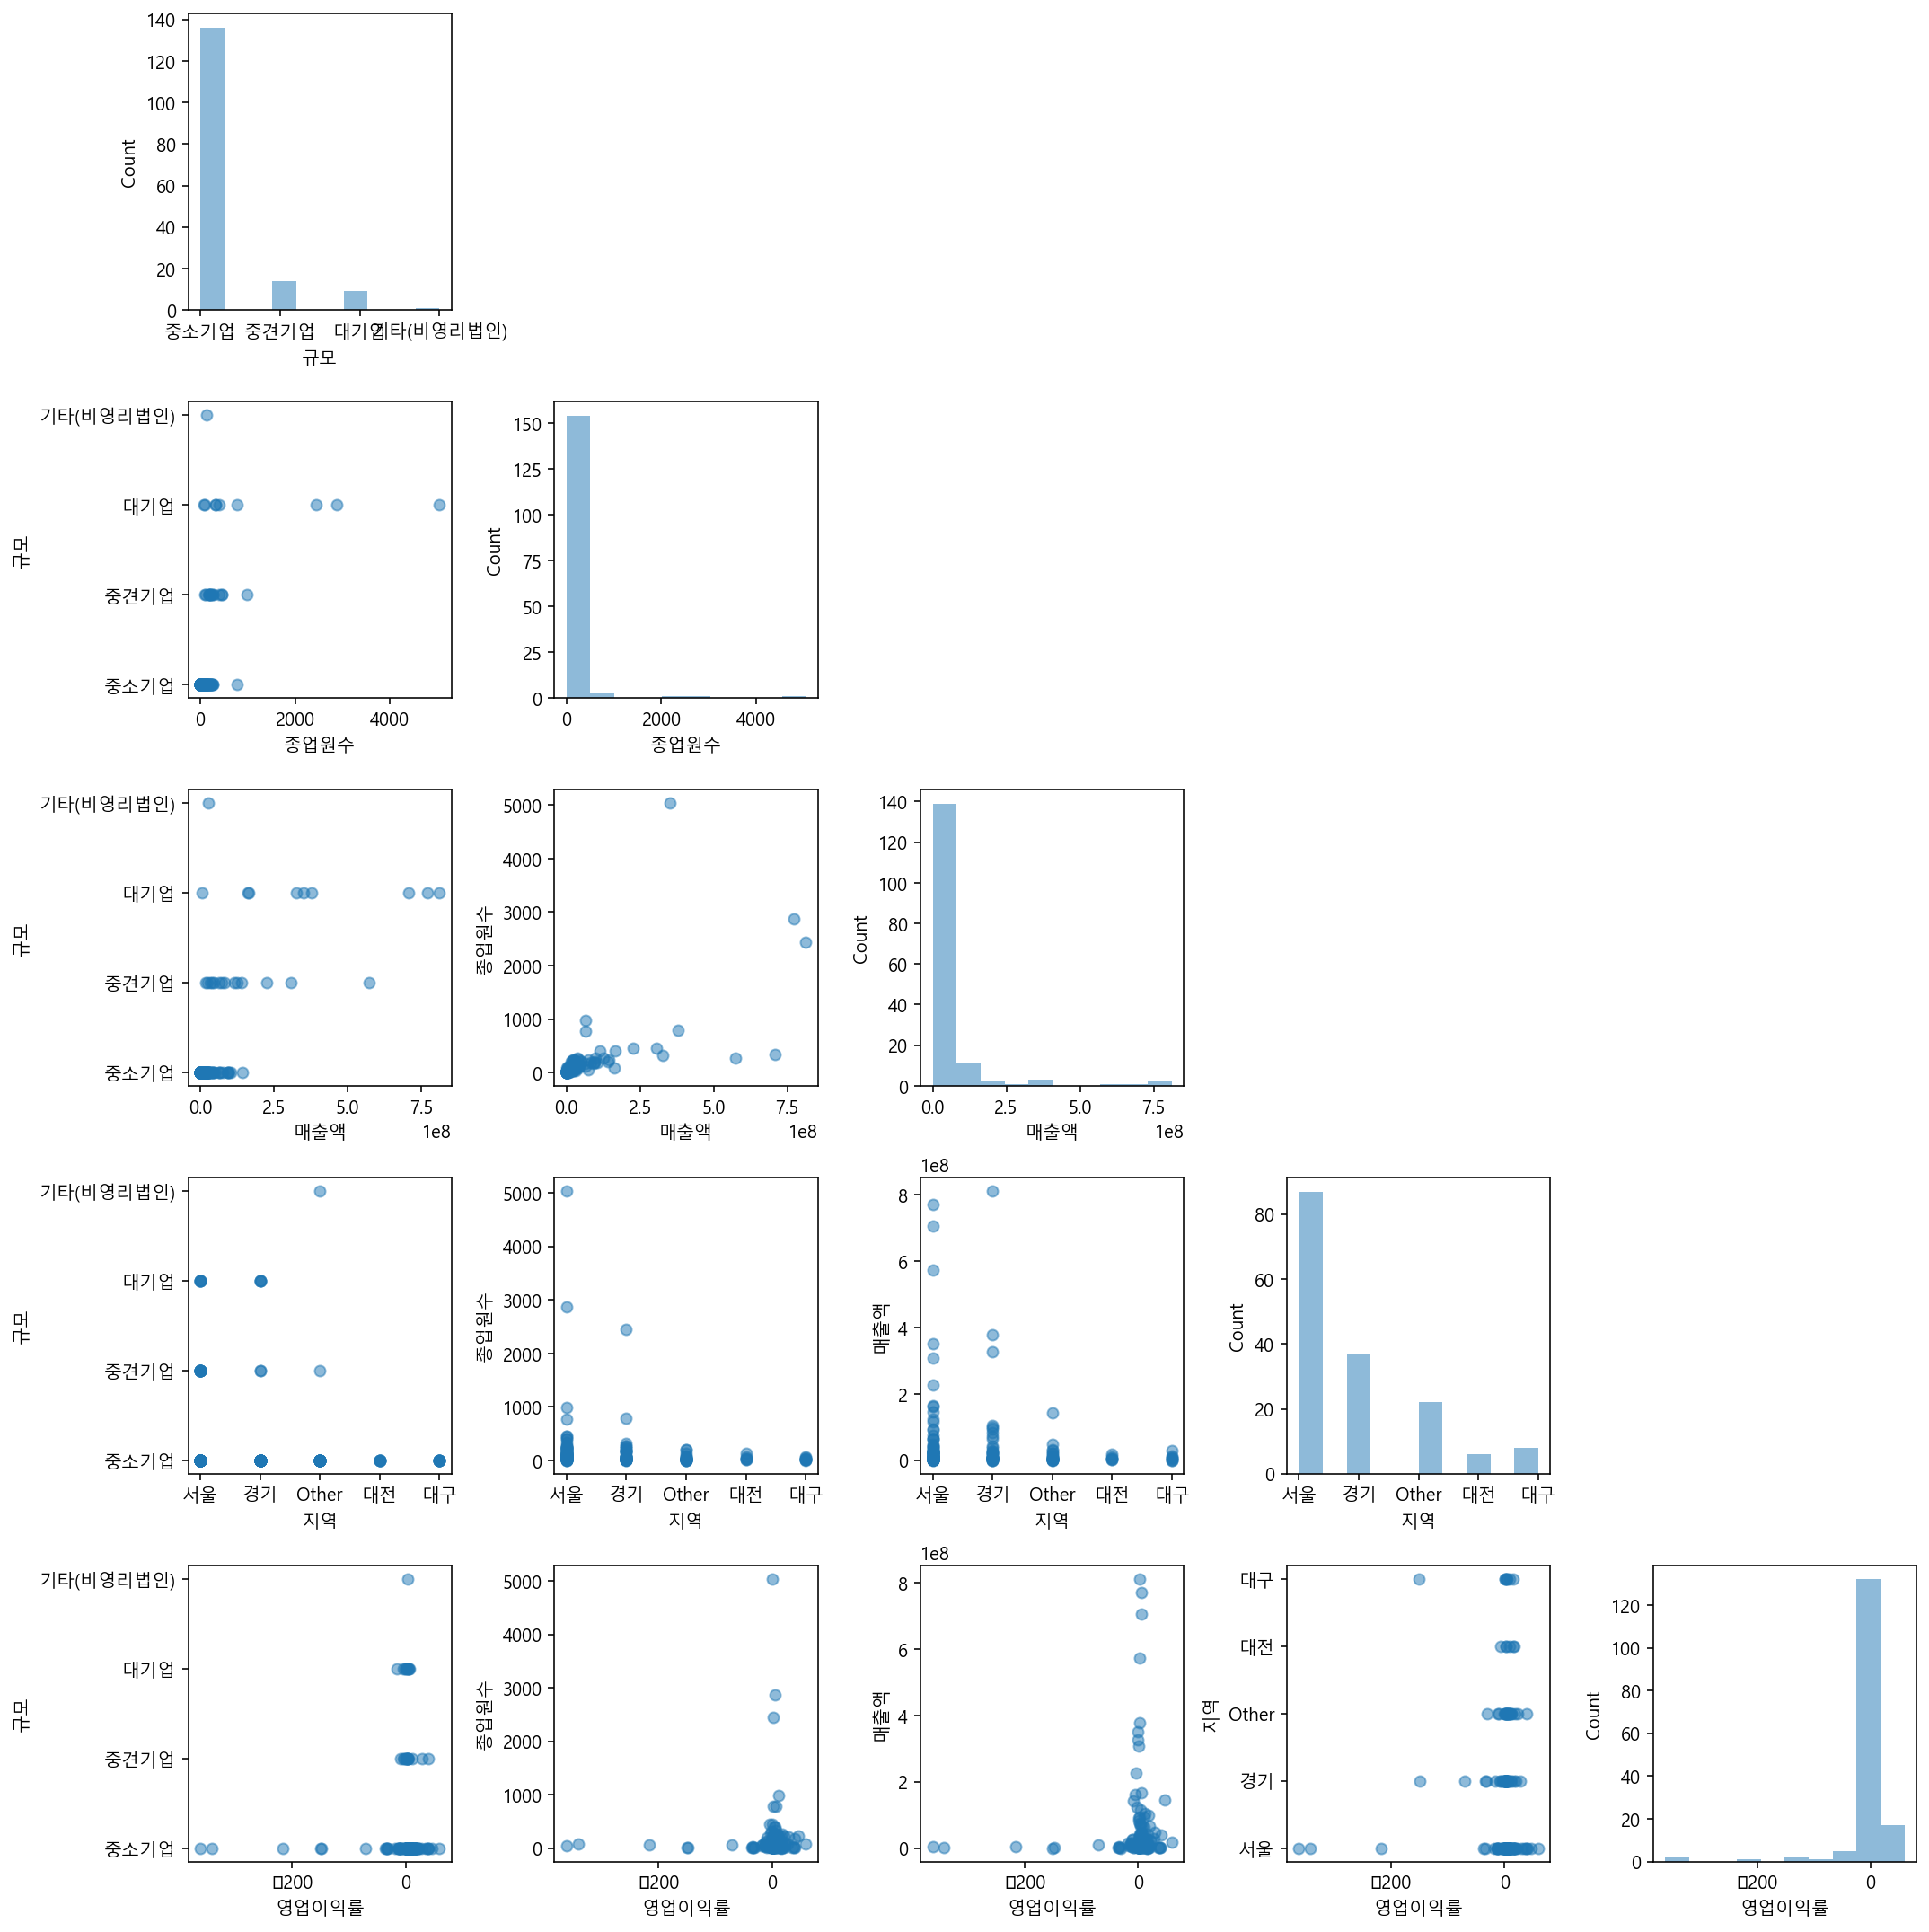

In [198]:
cols = ['규모', '종업원수', '매출액', '지역', '영업이익률']
scatterplotmatrix(new_df[cols].values, figsize=(15, 15), names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()


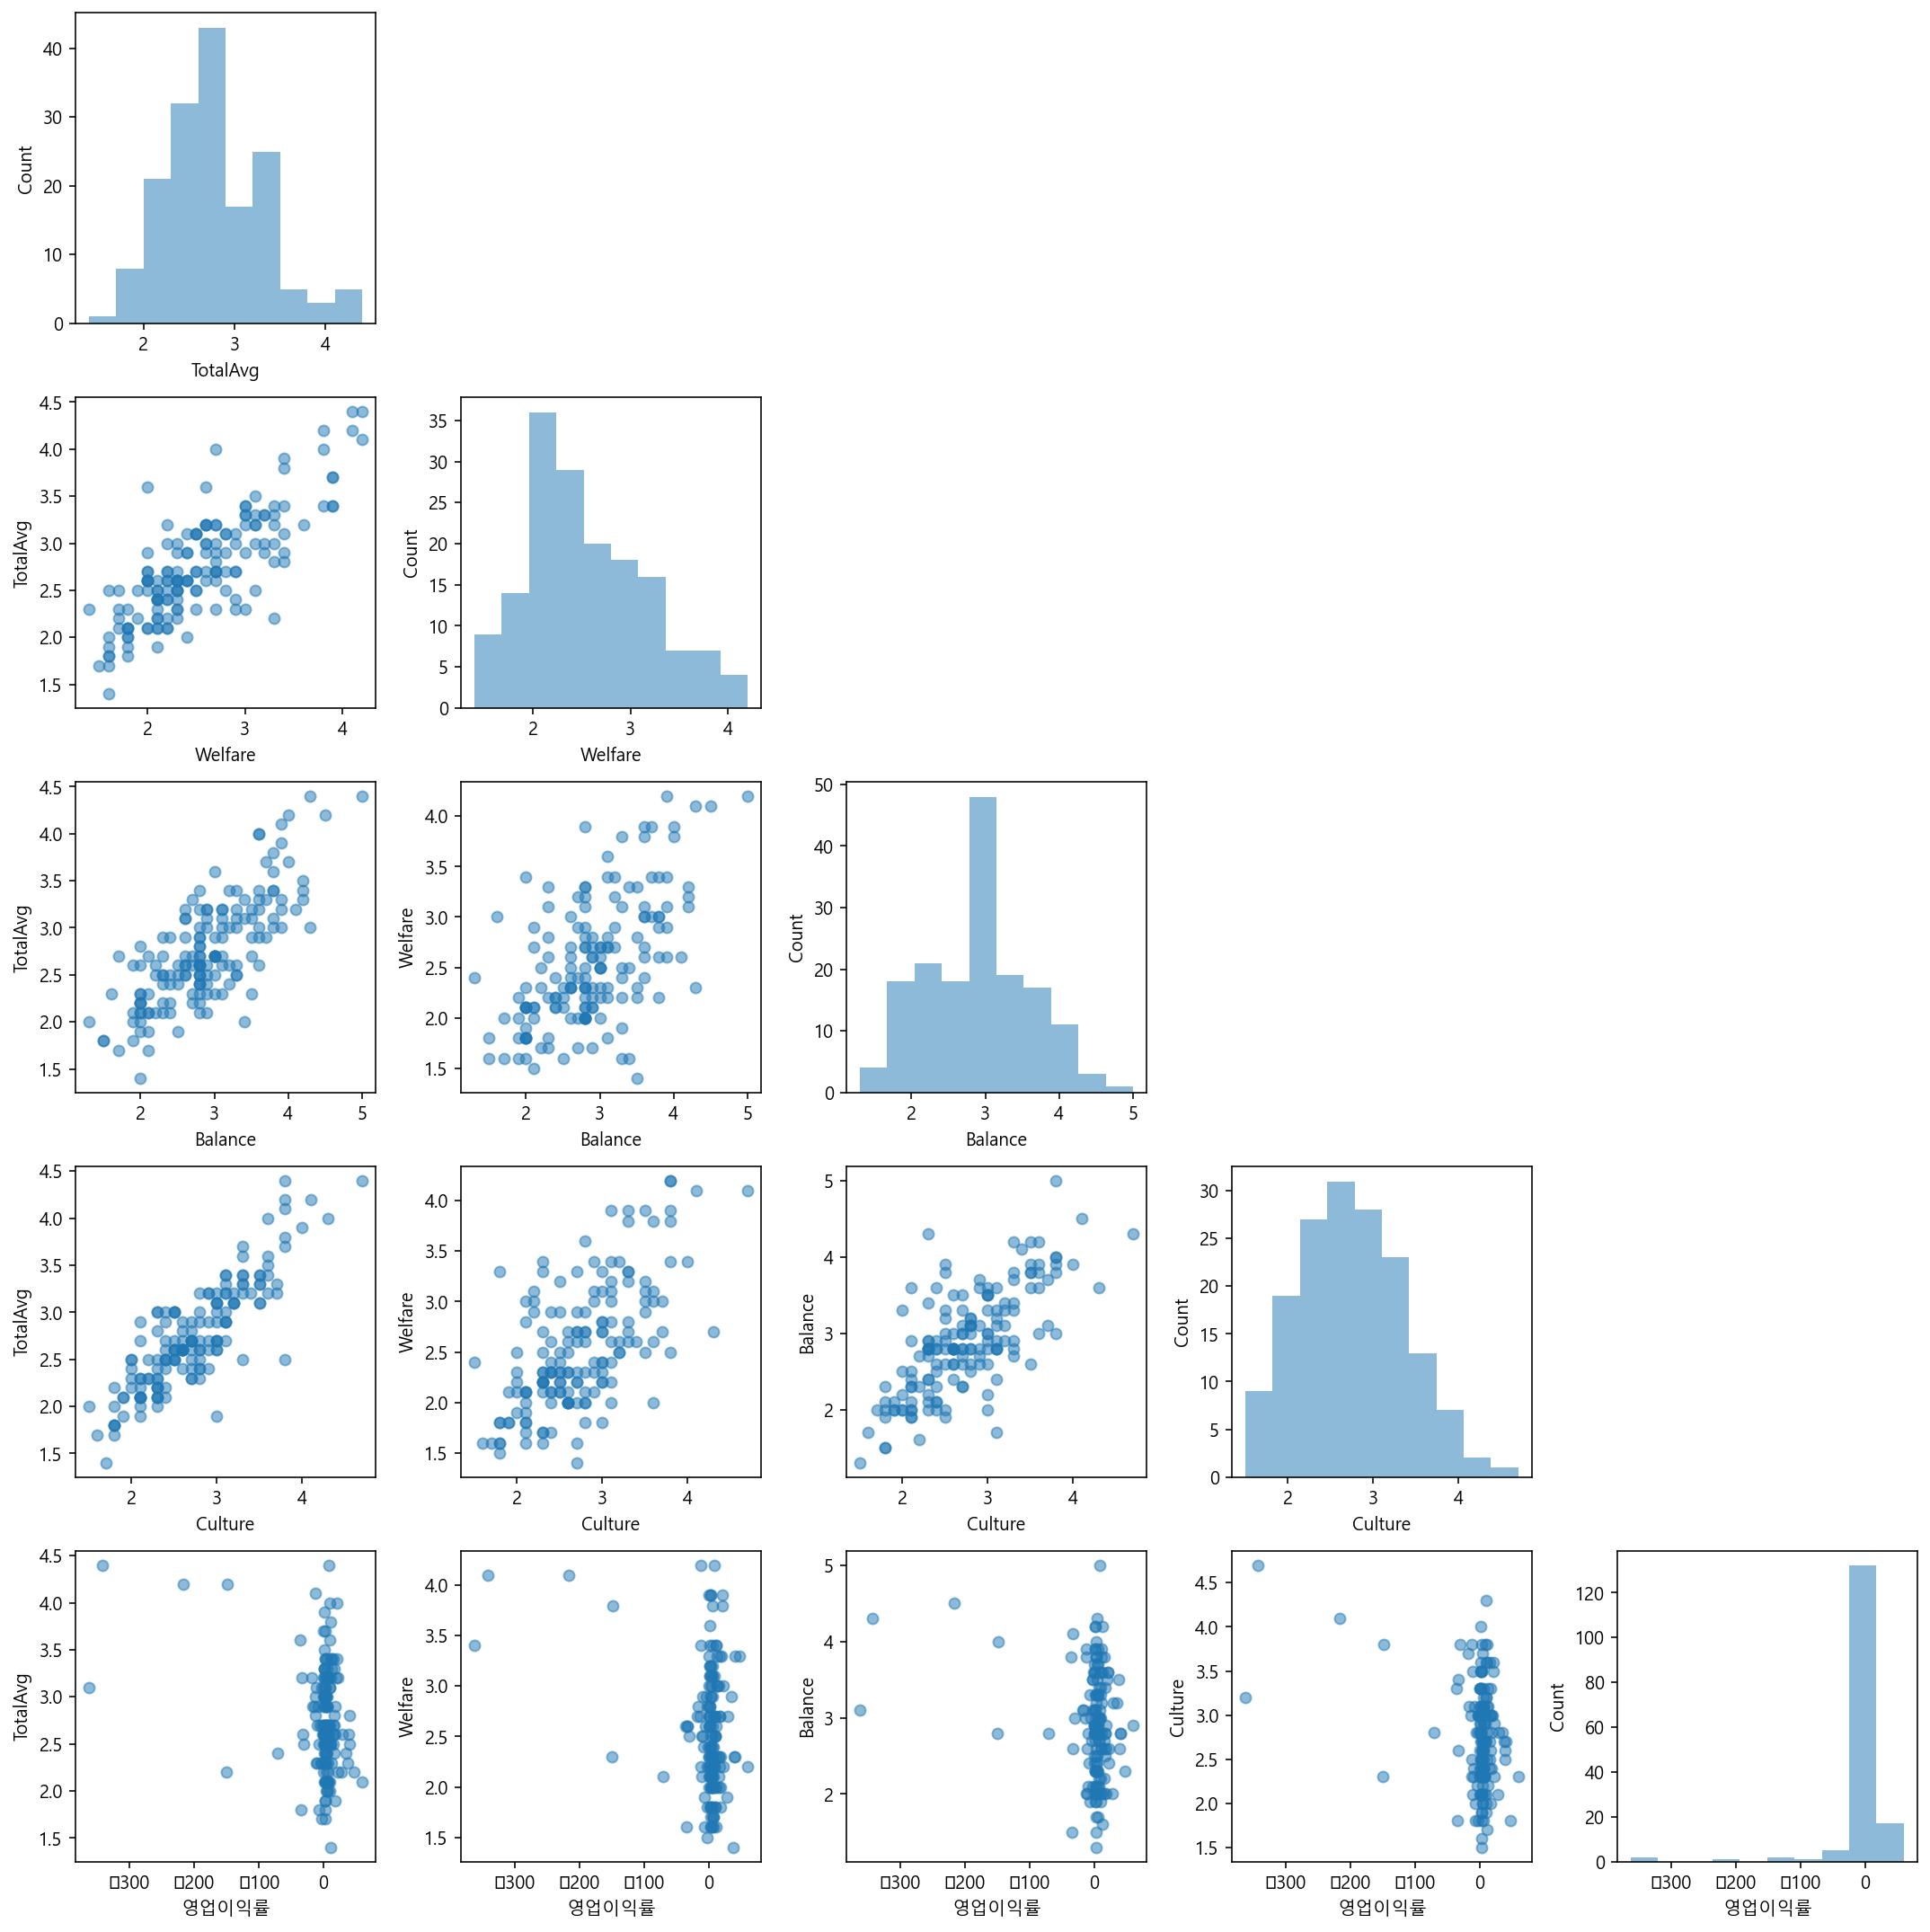

In [199]:
cols = ['TotalAvg', 'Welfare', 'Balance', 'Culture', '영업이익률']
scatterplotmatrix(new_df[cols].values, figsize=(15, 15), names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

# 변수 정규화

In [205]:
# minmax 함수
def MinMaxScaler(df):
    df = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    return df

In [208]:
new_df3 = new_df2

In [212]:
new_df3 = MinMaxScaler(new_df3)

# OLS

In [213]:
df_target = new_df3['영업이익률']

In [214]:
del new_df3['영업이익률']

In [217]:
import statsmodels.api as sm

lm=sm.OLS(df_target, new_df3)
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  영업이익률   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.58e-05
Time:                        09:27:54   Log-Likelihood:                 155.31
No. Observations:                 160   AIC:                            -254.6
Df Residuals:                     132   BIC:                            -168.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
종업원수                    0.0429      0.120      0.358      0.721      -0.194       0.280
자산총계                 7.772e+05   1.12e+07      0.069      0.945   -2.14e+07     2.3e+07
총부채                 -7.351e+05   1.06e+07     -0.069      0.945   -2.17e+07    2.02e+07
자본총계                 -6.84e+05   9.87e+06     -0.069      0.945   -2.02e+07    1.88e+07
매출액                    -0.2712      0.147     -1.845      0.067      -0.562       0.020
영업이익                    0.2626      0.195      1.346      0.180      -0.123       0.648
당기순이익                   0.2880      0.168      1.710      0.090      -0.045       0.621
TotalAvg               -0.0307      0.161     -0.191      0.849      -0.349       0.287
Welfare                -0.2003      0.078     -2.575      0.011      -0.354      -0.046
Balance                -0.0248      0.081     -0.308      0.759      -0.185       0.135
Culture                -0.0548      0.104     -0.525      0.601      -0.261       0.152
Promotion               0.6155      0.661      0.931      0.353      -0.692       1.923
Executive              -1.9596      0.670     -2.925      0.004      -3.285      -0.634
Recommend               0.1611      0.105      1.533      0.128      -0.047       0.369
Support                 0.1216      0.087      1.391      0.167      -0.051       0.295
Growth                  0.0213      0.154      0.138      0.890      -0.283       0.326
Log_Growth             -0.0551      0.122     -0.452      0.652      -0.296       0.186
Log_Promotion          -0.6005      0.637     -0.942      0.348      -1.861       0.660
Log_Executive           1.7587      0.621      2.834      0.005       0.531       2.986
규모_기타(비영리법인)         6.509e+04   9.39e+05      0.069      0.945   -1.79e+06    1.92e+06
규모_대기업               6.509e+04   9.39e+05      0.069      0.945   -1.79e+06    1.92e+06
규모_중견기업              6.509e+04   9.39e+05      0.069      0.945   -1.79e+06    1.92e+06
규모_중소기업              6.509e+04   9.39e+05      0.069      0.945   -1.79e+06    1.92e+06
지역_Other             5.207e+04   7.51e+05      0.069      0.945   -1.43e+06    1.54e+06
지역_경기                5.207e+04   7.51e+05      0.069      0.945   -1.43e+06    1.54e+06
지역_대구                5.207e+04   7.51e+05      0.069      0.945   -1.43e+06    1.54e+06
지역_대전                5.207e+04   7.51e+05      0.069      0.945   -1.43e+06    1.54e+06
지역_서울                5.207e+04   7.51e+05      0.069      0.945   -1.43e+06    1.54e+06
structure_Network    1.302e+05   1.88e+06      0.069      0.945   -3.58e+06    3.84e+06
structure_hierarchy  1.302e+05   1.88e+06      0.069      0.945   -3.58e+06    3.84e+06
==============================================================================
Omnibus:                      151.033   Durbin-Watson:                   1.857
Prob(Omnibus):       

In [235]:
del new_df3['Executive']
del new_df3['Promotion']
del new_df3['Growth']

# VIF

In [236]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df3.values, i)
     for i in range(new_df3.shape[1])]

vif["features"]=new_df3.columns
vif

C:\Users\JuNoe\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.178942e+00,종업원수
1,inf,자산총계
2,inf,총부채
3,9.007199e+15,자본총계
4,7.671229e+00,매출액
5,5.838665e+00,영업이익
6,7.121322e+00,당기순이익
7,1.316938e+01,TotalAvg
8,4.669520e+00,Welfare
9,3.462698e+00,Balance


In [237]:
new_df4 = new_df3

In [238]:
del new_df4['자산총계']

In [239]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

C:\Users\JuNoe\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.117096,종업원수
1,2.812097,총부채
2,1.914374,자본총계
3,7.650613,매출액
4,5.761440,영업이익
5,7.084949,당기순이익
6,13.141690,TotalAvg
7,4.562710,Welfare
8,3.333871,Balance
9,5.630807,Culture


In [240]:
del new_df4['규모_기타(비영리법인)']

In [241]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

C:\Users\JuNoe\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.117096,종업원수
1,2.812097,총부채
2,1.914374,자본총계
3,7.650613,매출액
4,5.761440,영업이익
5,7.084949,당기순이익
6,13.141690,TotalAvg
7,4.562710,Welfare
8,3.333871,Balance
9,5.630807,Culture


In [242]:
del new_df4['지역_Other']

In [243]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.117096,종업원수
1,2.812097,총부채
2,1.914374,자본총계
3,7.650613,매출액
4,5.761440,영업이익
5,7.084949,당기순이익
6,13.141690,TotalAvg
7,4.562710,Welfare
8,3.333871,Balance
9,5.630807,Culture


In [244]:
del new_df4['structure_hierarchy']

In [245]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.333835,종업원수
1,3.098744,총부채
2,30.528972,자본총계
3,8.754524,매출액
4,26.642968,영업이익
5,51.232621,당기순이익
6,87.544126,TotalAvg
7,19.941572,Welfare
8,21.217897,Balance
9,30.013834,Culture


In [246]:
del new_df4['TotalAvg']

In [247]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.279265,종업원수
1,3.062973,총부채
2,30.481496,자본총계
3,8.734202,매출액
4,26.640882,영업이익
5,51.223578,당기순이익
6,18.859682,Welfare
7,17.028062,Balance
8,27.846807,Culture
9,21.488957,Recommend


In [248]:
del new_df4['당기순이익']

In [249]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.277370,종업원수
1,2.980907,총부채
2,27.522142,자본총계
3,7.420240,매출액
4,9.241577,영업이익
5,18.794979,Welfare
6,16.987324,Balance
7,27.814365,Culture
8,21.392908,Recommend
9,21.907382,Support


In [250]:
del new_df4['Log_Executive']

In [251]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.273386,종업원수
1,2.965145,총부채
2,27.520297,자본총계
3,7.392904,매출액
4,9.228564,영업이익
5,18.651503,Welfare
6,16.635234,Balance
7,21.792429,Culture
8,21.002759,Recommend
9,17.005267,Support


In [252]:
del new_df4['규모_중소기업']

In [253]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.272679,종업원수
1,2.964830,총부채
2,19.148971,자본총계
3,7.362030,매출액
4,9.197354,영업이익
5,18.546386,Welfare
6,14.983200,Balance
7,21.791314,Culture
8,19.237473,Recommend
9,17.002846,Support


In [254]:
del new_df4['Recommend']

In [255]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.258289,종업원수
1,2.950919,총부채
2,17.640100,자본총계
3,7.318990,매출액
4,9.195012,영업이익
5,12.318671,Welfare
6,14.480491,Balance
7,21.324853,Culture
8,15.665745,Support
9,10.464706,Log_Growth


In [256]:
del new_df4['자본총계']

In [257]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.174081,종업원수
1,2.922969,총부채
2,7.317574,매출액
3,6.225407,영업이익
4,12.312634,Welfare
5,13.886593,Balance
6,21.049385,Culture
7,15.560772,Support
8,10.214455,Log_Growth
9,14.804861,Log_Promotion


In [258]:
del new_df4['Culture']

In [259]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.135979,종업원수
1,2.922765,총부채
2,7.311316,매출액
3,6.063843,영업이익
4,12.290891,Welfare
5,9.516474,Balance
6,14.772289,Support
7,10.102659,Log_Growth
8,13.671869,Log_Promotion
9,2.808970,규모_대기업


In [260]:
del new_df4['Support']

In [261]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.135098,종업원수
1,2.922079,총부채
2,7.163086,매출액
3,5.390080,영업이익
4,10.402691,Welfare
5,9.292467,Balance
6,8.833594,Log_Growth
7,12.167132,Log_Promotion
8,2.782664,규모_대기업
9,1.417025,규모_중견기업


In [262]:
del new_df4['Log_Promotion']

In [263]:
# VIF (분산 평창 인자)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(new_df4.values, i)
     for i in range(new_df4.shape[1])]

vif["features"]=new_df4.columns
vif

,VIF Factor,features
0,2.132734,종업원수
1,2.921844,총부채
2,7.118823,매출액
3,5.368277,영업이익
4,8.457588,Welfare
5,9.013274,Balance
6,7.841171,Log_Growth
7,2.779864,규모_대기업
8,1.416278,규모_중견기업
9,2.006008,지역_경기


In [265]:
new_df4.columns

Index(['종업원수', '총부채', '매출액', '영업이익', 'Welfare', 'Balance', 'Log_Growth',
       '규모_대기업', '규모_중견기업', '지역_경기', '지역_대구', '지역_대전', '지역_서울',
       'structure_Network'],
      dtype='object')

# 다중공선성 처리 후 OLS

In [266]:
import statsmodels.api as sm

lm=sm.OLS(df_target, new_df4)
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  영업이익률   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              159.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                    5.68e-81
Time:                        10:03:34   Log-Likelihood:                          20.632
No. Observations:                 160   AIC:                                     -13.26
Df Residuals:                     146   BIC:                                      29.79
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
종업원수                  0.2574      0.246      1.045      0.298      -0.229       0.744
총부채                  -0.1412      0.265     -0.533      0.595      -0.665       0.382
매출액                  -0.4835      0.286     -1.689      0.093      -1.049       0.082
영업이익                  1.6074      0.188      8.546      0.000       1.236       1.979
Welfare              -0.2332      0.109     -2.132      0.035      -0.449      -0.017
Balance               0.4852      0.113      4.310      0.000       0.263       0.708
Log_Growth            0.3453      0.088      3.941      0.000       0.172       0.519
규모_대기업                0.0097      0.124      0.079      0.937      -0.235       0.254
규모_중견기업               0.1564      0.071      2.208      0.029       0.016       0.296
지역_경기                 0.3094      0.052      5.968      0.000       0.207       0.412
지역_대구                 0.2701      0.087      3.092      0.002       0.097       0.443
지역_대전                 0.2949      0.100      2.959      0.004       0.098       0.492
지역_서울                 0.2212      0.048      4.591      0.000       0.126       0.316
structure_Network     0.0183      0.037      0.490      0.625      -0.055       0.092
==============================================================================
Omnibus:                       47.070   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.218
Skew:                          -1.183   Prob(JB):                     1.44e-28
Kurtosis:                       6.692   Cond. No.                         24.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
new_df4['영업이익률'] = df_target

In [270]:
new_df4.to_csv("data/preprocessed_data_for_clusters.csv",  encoding='cp949')